In [70]:
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [71]:
# reading data
data = pd.read_excel('um regression.xlsx')
data

,ID,Willingness,morning time,night time,30-45 cost per mile,45-60 cost per mile,crowd density,distance,weather,carrying weight
0,1,7,10,1,9,9,3,8,6,5
1,2,8,3,8,9,2,8,6,9,8
2,3,8,7,6,8,7,7,6,7,7
3,4,6,9,10,2,5,4,8,9,2
4,5,8,9,9,8,7,9,8,8,10
5,6,7,8,5,8,4,10,8,4,9
6,7,9,10,10,5,5,3,8,10,9
7,8,5,9,8,7,9,8,7,7,7
8,9,7,8,9,7,6,6,5,6,6
9,10,8,10,2,10,8,8,9,9,9


In [3]:
data.shape # displaying data shape

(30, 10)

In [25]:
y = data['Willingness '] # dependent variable
X = data.drop(['Willingness ', 'ID'], axis = 1) # selecting all the features by dropping 'id' and 'Willigness'

In [12]:
# training logistic regression (if required)
lr = SGDClassifier(loss = 'log', n_jobs = -1)
lr.fit(X,y)

SGDClassifier(loss='log', n_jobs=-1)

In [26]:
# training linear regression
lr = LinearRegression(n_jobs = -1)
lr.fit(X,y)

LinearRegression(n_jobs=-1)

In [27]:
preds = lr.predict(X)

In [ ]:
# accuracy_score(y, preds) # run if you want classification

In [28]:
r2_score(y, preds)  # ranges from -1 to 1

0.4501354485444685

In [29]:
for i in range(len(y)):
    print(f'Original: {y.iloc[i]}     Predicted: {preds[i]}')

Original: 7     Predicted: 7.082483499554762
Original: 8     Predicted: 7.537554392650598
Original: 8     Predicted: 7.175892427130625
Original: 6     Predicted: 6.2052323284583935
Original: 8     Predicted: 7.772370046078461
Original: 7     Predicted: 7.432883795595466
Original: 9     Predicted: 8.664596255269633
Original: 5     Predicted: 6.798077146094563
Original: 7     Predicted: 7.179471038091891
Original: 8     Predicted: 8.108068386151867
Original: 6     Predicted: 7.049183129711783
Original: 8     Predicted: 7.131536274639462
Original: 8     Predicted: 5.848828674730659
Original: 7     Predicted: 7.215505009252387
Original: 8     Predicted: 7.988345595361606
Original: 9     Predicted: 8.186339782987517
Original: 8     Predicted: 7.660220313530239
Original: 7     Predicted: 7.2343026800755865
Original: 8     Predicted: 8.223169750740182
Original: 8     Predicted: 7.633073136166083
Original: 9     Predicted: 8.454050860310417
Original: 6     Predicted: 6.098714744950087
Original

In [44]:
coefs = lr.coef_ # coefficients of the hyperplane

In [45]:
# converting negative to positive values
for i in range(len(coefs)):
    if coefs[i] < 0:
        coefs[i] *= -1
    else:
        continue

In [50]:
# sorting the coefs with their features
res = []
for i in range(len(coefs)):
    res.append((X.columns[i], coefs[i]))
    
sorted_res = sorted(res, key = lambda l: l[1])

cols = []
c = []
for j in range(len(res)):
    cols.append(sorted_res[j][0])
    c.append(sorted_res[j][1])

Text(0.5, 1.0, 'Feature Significance')

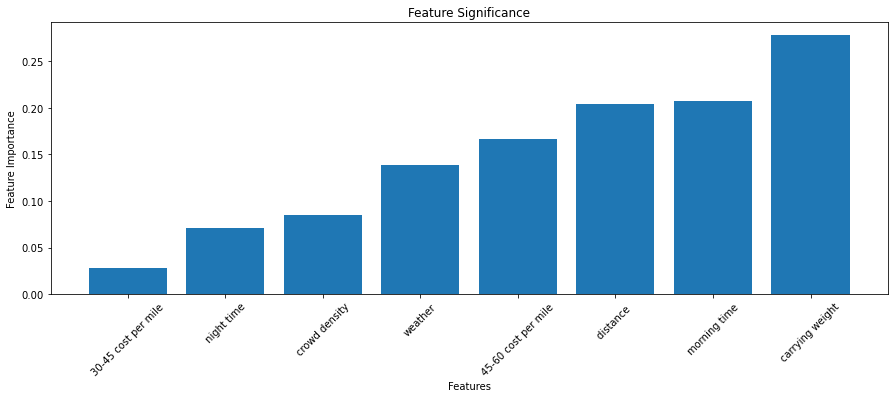

In [68]:
# plotting the feature significance (sorted)
fig = plt.figure(figsize = (15,5))
plt.bar(cols, c)
x = plt.xticks(rotation = 45)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Significance')

Text(0.5, 1.0, 'Feature Significance')

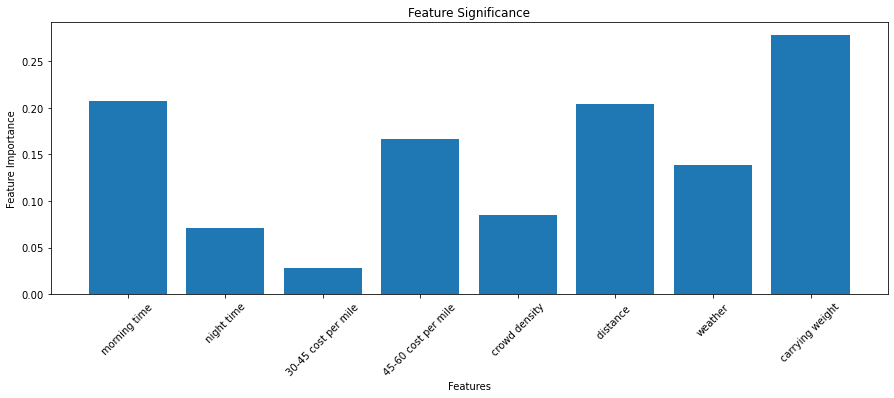

In [67]:
# plotting the feature significance

fig = plt.figure(figsize = (15,5))
plt.bar(X.columns, coefs)
x = plt.xticks(rotation = 45)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Significance')

In [ ]:
# Eqn of a hyperplane
# y = w1*f1 + w2*f2 + w3*f3 + .... + wn*fn